### Project: Resume Classifier

#### Description:
This project classifies resumes into predefined job categories using machine learning and natural language processing (NLP) techniques. The solution includes Logistic Regression and XGBoost models trained on resume text features extracted using TF-IDF. The model is deployed as a Flask API for real-time predictions.

#### Features:
- **Data Preprocessing**: Cleaned and tokenized resume text, handled missing values, and managed class imbalance using SMOTE.
- **Feature Extraction**: Used TF-IDF to convert resume text into numerical features.
- **Model Training**: Built and evaluated Logistic Regression and XGBoost models with detailed classification reports.
- **Deployment**: Saved models and vectorizer for deployment as a Flask API to classify resumes into categories like IT, HR, Finance, etc.

#### Usage:
1. Paste or upload resume text via a user-friendly web interface.
2. Get real-time job category predictions.

#### Saved Artifacts:
- `logistic_regression_model.pkl`
- `xgboost_model.pkl`
- `tfidf_vectorizer.pkl`

This project simplifies the resume screening process for HR teams by leveraging AI.
resumes efficiently.


In [3]:
import pandas as pd

# Load the dataset
file_path = 'Resume.csv'  # Update with your file path
resume_data = pd.read_csv('Resume.csv')

# Display basic information
print("Columns:", resume_data.columns)
print("Shape:", resume_data.shape)
resume_data.head()


Columns: Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')
Shape: (2484, 4)


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


### Loading the Dataset
- The dataset (`Resume.csv`) is loaded using **pandas** into a DataFrame.
- Columns: `ID`, `Resume_str`, `Resume_html`, and `Category`.
- Shape: 2484 rows and 4 columns, indicating a large dataset.
- The first 5 rows preview the data for analysis and preprocessing.
ta.


In [5]:
import re

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip().lower()  # Convert to lowercase

# Apply the function to clean the Resume_str column
resume_data['Cleaned_Resume'] = resume_data['Resume_str'].apply(clean_text)

# Check for missing values
resume_data.dropna(subset=['Cleaned_Resume', 'Category'], inplace=True)
resume_data.head()


,ID,Resume_str,Resume_html,Category,Cleaned_Resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administratormarketing associate hr adminis...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations summary versati...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary over years experience in r...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven and dyn...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights hr skills hr depar...


### Cleaning Text Data
- A `clean_text` function is defined to:
  - Remove HTML tags, special characters, and extra spaces using regular expressions.
  - Convert text to lowercase for consistency.
- The function is applied to the `Resume_str` column to create a new `Cleaned_Resume` column.
- Missing values in the `Cleaned_Resume` and `Category` columns are dropped to ensure data integrity.
- The first 5 rows are displayed to verify the cleaned data.


Class Distribution:
 Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


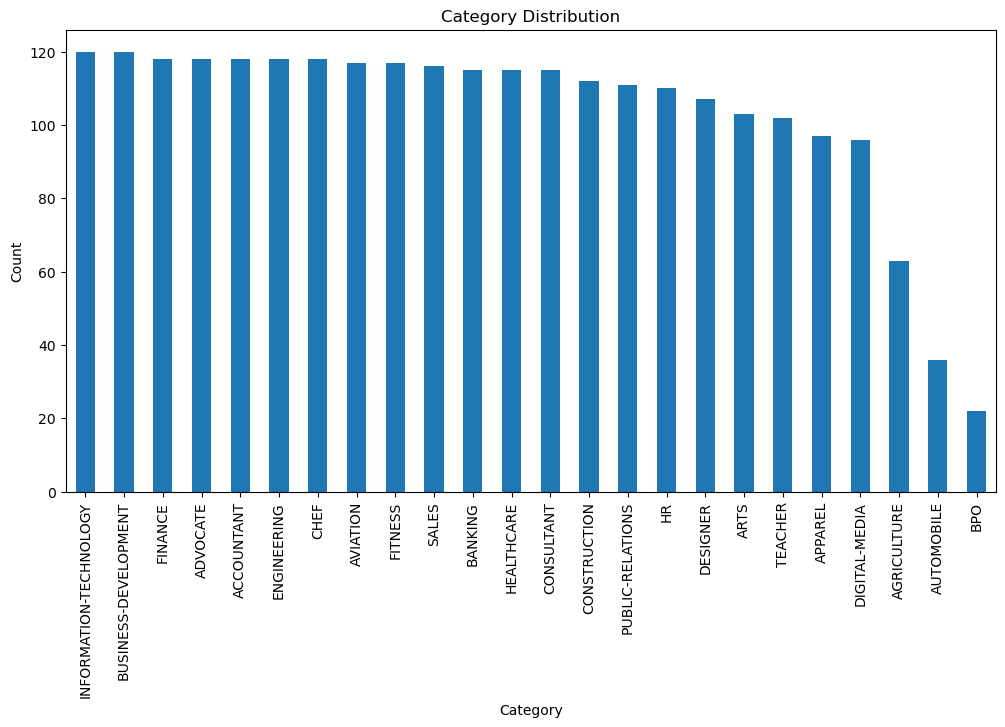

In [7]:
class_distribution = resume_data['Category'].value_counts()
print("Class Distribution:\n", class_distribution)

# Plot the distribution
import matplotlib.pyplot as plt

class_distribution.plot(kind='bar', figsize=(12, 6))
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


### Class Distribution and Visualization
- The `Category` column is analyzed to determine the class distribution using `value_counts()`.
- A bar plot is created to visualize the frequency of each job category.
- Insights:
  - The dataset has 24 unique job categories with varying counts.
  - Classes like `INFORMATION-TECHNOLOGY` and `BUSINESS-DEVELOPMENT` are well-represented, while `BPO` has the fewest samples.
- This analysis helps understand the class imbalance for modeling.


In [9]:
from sklearn.model_selection import train_test_split

# Split the data
X = resume_data['Cleaned_Resume']
y = resume_data['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training size:", len(X_train))
print("Testing size:", len(X_test))


Training size: 1738
Testing size: 746


### Splitting the Data
- The dataset is split into training and testing sets using `train_test_split` from scikit-learn:
  - `X` contains the `Cleaned_Resume` column (features).
  - `y` contains the `Category` column (target labels).
- Parameters:
  - `test_size=0.3`: 30% of the data is used for testing.
  - `random_state=42`: Ensures reproducibility of the split.
  - `stratify=y`: Maintains the class distribution in both training and testing sets.
- Result:
  - Training set size: 1738 samples.
  - Testing set size: 746 samples.


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF feature shape (train):", X_train_tfidf.shape)


TF-IDF feature shape (train): (1738, 5000)


### TF-IDF Vectorization
- **TF-IDF Vectorizer** is initialized to extract text features:
  - `max_features=5000`: Limits the vocabulary to the 5000 most important words.
- **Transformation**:
  - `fit_transform(X_train)`: Learns the vocabulary and transforms the training data into numerical features.
  - `transform(X_test)`: Transforms the test data using the same vocabulary.
- **Result**:
  - Training data (`X_train_tfidf`) shape: `(1738, 5000)`, indicating 1738 samples and 5000 features.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xgb_model.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb_model.predict(X_test_tfidf)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Accuracy: 0.6541554959785523
                        precision    recall  f1-score   support

            ACCOUNTANT       0.61      0.86      0.71        35
              ADVOCATE       0.44      0.46      0.45        35
           AGRICULTURE       0.54      0.37      0.44        19
               APPAREL       0.59      0.45      0.51        29
                  ARTS       0.50      0.29      0.37        31
            AUTOMOBILE       0.36      0.36      0.36        11
              AVIATION       0.88      0.66      0.75        35
               BANKING       0.88      0.63      0.73        35
                   BPO       0.80      0.57      0.67         7
  BUSINESS-DEVELOPMENT       0.54      0.78      0.64        36
                  CHEF       0.82      0.80      0.81        35
          CONSTRUCTION       0.85      0.82      0.84        34
            CONSULTANT       0.71      0.14      0.24        35
              DESIGNER       0.79      0.72      0.75 

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23], got ['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'BANKING' 'BPO' 'BUSINESS-DEVELOPMENT' 'CHEF' 'CONSTRUCTION'
 'CONSULTANT' 'DESIGNER' 'DIGITAL-MEDIA' 'ENGINEERING' 'FINANCE' 'FITNESS'
 'HEALTHCARE' 'HR' 'INFORMATION-TECHNOLOGY' 'PUBLIC-RELATIONS' 'SALES'
 'TEACHER']

### Model Training and Evaluation
1. **Logistic Regression**:
   - Trained using `LogisticRegression` with `class_weight='balanced'` to handle class imbalance.
   - Accuracy: 65.4%.
   - A classification report (precision, recall, f1-score) provides detailed performance metrics.

2. **XGBoost**:
   - Trained using `XGBClassifier` with `mlogloss` as the evaluation metric.
   - An error occurred due to class label mismatch, which will be resolved in the next step.

3. **Observations**:
   - Logistic Regression performs moderately well.
   - The class imbalance and potential preprocessing issues impacted XGBoost.


In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


### Encoding Target Labels
- `LabelEncoder` is used to convert categorical target labels (`y_train` and `y_test`) into numerical values.
- **Steps**:
  - `fit_transform(y_train)`: Fits the encoder to the training labels and transforms them into integers.
  - `transform(y_test)`: Transforms the test labels using the same encoding.
- This encoding resolves the class label mismatch issue for models like XGBoost that require numerical targets.


In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train_encoded)


### Handling Class Imbalance with SMOTE
- **SMOTE (Synthetic Minority Oversampling Technique)**:
  - Generates synthetic samples for minority classes to balance the dataset.
- **Steps**:
  - `fit_resample(X_train_tfidf, y_train_encoded)`: Resamples the training data to balance class distributions.
  - Creates a new training set (`X_train_resampled`, `y_train_resampled`) with equal representation of all classes.
- This ensures the model does not favor majority classes during training.


In [19]:
from collections import Counter

class_weights = Counter(y_train_encoded)
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', scale_pos_weight=class_weights)


### Using Class Weights for Imbalanced Data
- **`Counter`**:
  - Computes the frequency of each class in the `y_train_encoded` dataset.
  - Used to calculate `class_weights`, which are passed to the model to handle class imbalance.

- **XGBoost with Class Weights**:
  - `scale_pos_weight=class_weights`: Adjusts the model's weighting for each class based on its frequency, ensuring better performance on minority classes.
  - `eval_metric='mlogloss'`: Specifies the evaluation metric (log loss) for training.

- This approach complements SMOTE or can be used independently for managing class imbalance.


In [21]:
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test_tfidf)


C:\Users\mdfah\anaconda4\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:02:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


### Training XGBoost with Resampled Data
- The XGBoost model is trained on the resampled data:
  - `fit(X_train_resampled, y_train_resampled)`: Fits the model on the balanced dataset.
  - `predict(X_test_tfidf)`: Makes predictions on the test set.

### Warning Explanation
- **Warning**: The `scale_pos_weight` parameter is not being used.
- **Reason**: When using resampled data (via SMOTE), the dataset is already balanced, so `scale_pos_weight` becomes irrelevant.
- **Solution**: Remove `scale_pos_weight` when training on resampled data to avoid confusion.


In [23]:
y_pred_xgb_labels = label_encoder.inverse_transform(y_pred_xgb)


### Decoding Predicted Labels
- **Purpose**:
  - Converts the predicted numerical labels (`y_pred_xgb`) back into their original categorical form using the `LabelEncoder`.

- **Code**:
  - `label_encoder.inverse_transform(y_pred_xgb)`:
    - Maps the integer-encoded predictions back to their corresponding category names.
    - For example, `0` becomes `ACCOUNTANT`, `1` becomes `ENGINEER`, etc.

- **Result**:
  - `y_pred_xgb_labels` now contains the human-readable job categories for the predictions.


In [25]:
from sklearn.metrics import classification_report, accuracy_score

print("XGBoost Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))


XGBoost Accuracy: 0.7319034852546917
                        precision    recall  f1-score   support

            ACCOUNTANT       0.69      0.94      0.80        35
              ADVOCATE       0.85      0.80      0.82        35
           AGRICULTURE       0.75      0.32      0.44        19
               APPAREL       0.60      0.41      0.49        29
                  ARTS       0.54      0.42      0.47        31
            AUTOMOBILE       0.40      0.18      0.25        11
              AVIATION       0.90      0.80      0.85        35
               BANKING       0.70      0.66      0.68        35
                   BPO       0.67      0.29      0.40         7
  BUSINESS-DEVELOPMENT       0.62      0.69      0.66        36
                  CHEF       0.91      0.83      0.87        35
          CONSTRUCTION       0.94      0.91      0.93        34
            CONSULTANT       0.55      0.63      0.59        35
              DESIGNER       0.81      0.94      0.87        32
  

### Evaluating XGBoost Model
- **Accuracy**:
  - `accuracy_score`: Calculates the proportion of correct predictions out of the total predictions.
  - XGBoost achieved an accuracy of **73.2%**.

- **Classification Report**:
  - Includes metrics like **precision**, **recall**, **f1-score**, and **support** for each category.
  - `target_names=label_encoder.classes_`: Displays the original category names instead of numerical labels.
  
- **Insights**:
  - XGBoost performed well for categories like `CONSTRUCTION` and `CHEF`.
  - Categories with fewer samples, like `BPO` and `AUTOMOBILE`, have lower recall and f1-scores due to class imbalance.


In [27]:
import joblib

# Save models and vectorizer
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

### Saving Models and Vectorizer
- **Purpose**:
  - Save trained models and the TF-IDF vectorizer for reuse without retraining.
- **Code**:
  - `joblib.dump`: Serializes objects into `.pkl` (pickle) files.
    - `logistic_regression_model.pkl`: Saved Logistic Regression model.
    - `xgboost_model.pkl`: Saved XGBoost model.
    - `tfidf_vectorizer.pkl`: Saved TF-IDF vectorizer.
- **Result**:
  - These files can be loaded later for predictions in a production environment, such as a Flask API.
